In [165]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [166]:
csv_path = 'datasets/cleaned_dataset.csv'

In [167]:
df = pd.read_csv(csv_path)

## Trasformazione Nickname

In [168]:
df['nickname_length'] = 0
df['nickname_num_special_characters'] = 0

pattern = re.compile(r'[^a-zA-Z ]')

df['nickname'] = df['nickname'].fillna('')

for i, nickname in enumerate(df['nickname']):
    df.loc[i, 'nickname_length'] = len(nickname)
    list_pattern = pattern.findall(nickname)
    len_list_pattern = len(list_pattern)

    # da valutare se mantenerla
    if len_list_pattern == 0: df.loc[i, 'nickname_num_special_characters'] = 0
    if len_list_pattern == 1: df.loc[i, 'nickname_num_special_characters'] = 1
    if len_list_pattern == 2: df.loc[i, 'nickname_num_special_characters'] = 2
    if len_list_pattern >= 3: df.loc[i, 'nickname_num_special_characters'] = 3

In [169]:
df_fake_true = df[df['fake'] == 1]
df_fake_false = df[df['fake'] == 0]

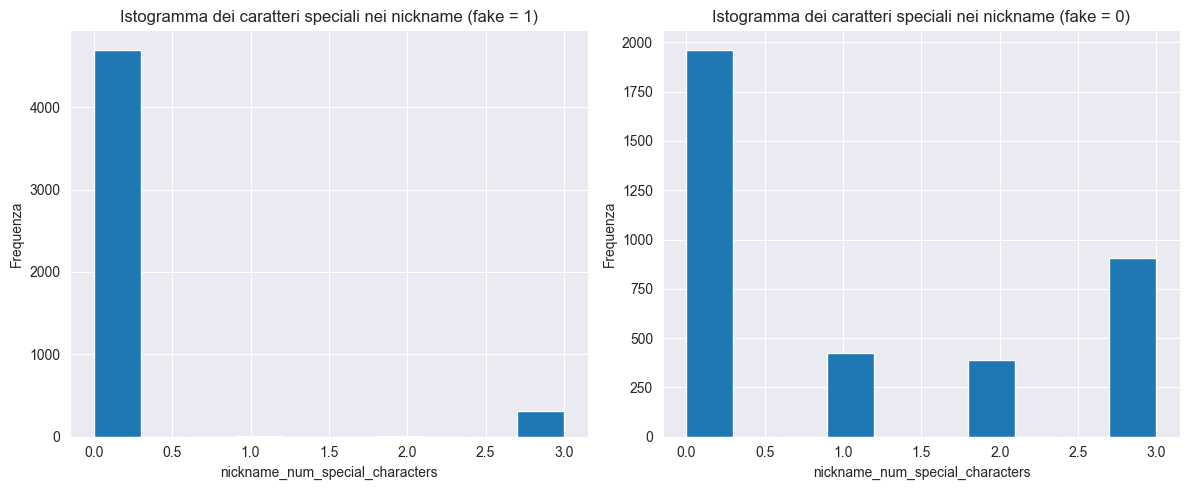

In [170]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_fake_true['nickname_num_special_characters'].hist()
plt.xlabel('nickname_num_special_characters')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri speciali nei nickname (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['nickname_num_special_characters'].hist()
plt.xlabel('nickname_num_special_characters')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri speciali nei nickname (fake = 0)')

plt.tight_layout()
plt.show()

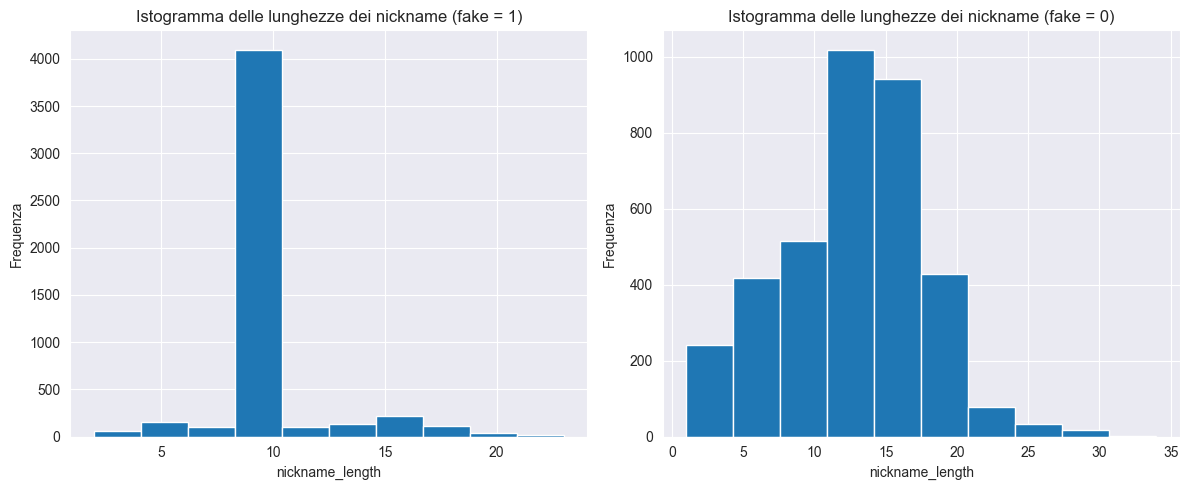

In [171]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_fake_true['nickname_length'].hist()
plt.xlabel('nickname_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze dei nickname (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['nickname_length'].hist()
plt.xlabel('nickname_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze dei nickname (fake = 0)')

plt.tight_layout()
plt.show()

## Trasformazione openFavourite

In [172]:
df['openFavorite'] = np.where(df['openFavorite'] == False, 0, 1)

## Trasformazione verified

In [173]:
df['verified'] = np.where(df['verified'] == False, 0, 1)

## Trasformazione fake

In [174]:
df['fake'] = np.where(df['fake'] == False, 0, 1)

## Trasformazione uniqueId

In [175]:
df['uniqueId_num_digits'] = 0
df['uniqueId_length'] = 0

pattern = re.compile(r'\d')

for i, uniqueId in enumerate(df['uniqueId']):
    df.loc[i, 'uniqueId_length'] = len(uniqueId)
    list_pattern = pattern.findall(uniqueId)
    len_list_pattern = len(list_pattern)

    # lo consideriamo
    if len_list_pattern == 0: df.loc[i, 'uniqueId_num_digits'] = 0
    if len_list_pattern == 1: df.loc[i, 'uniqueId_num_digits'] = 1
    if len_list_pattern == 2: df.loc[i, 'uniqueId_num_digits'] = 2
    if len_list_pattern >= 3: df.loc[i, 'uniqueId_num_digits'] = 3

In [176]:
df_fake_true = df[df['fake'] == 1]
df_fake_false = df[df['fake'] == 0]

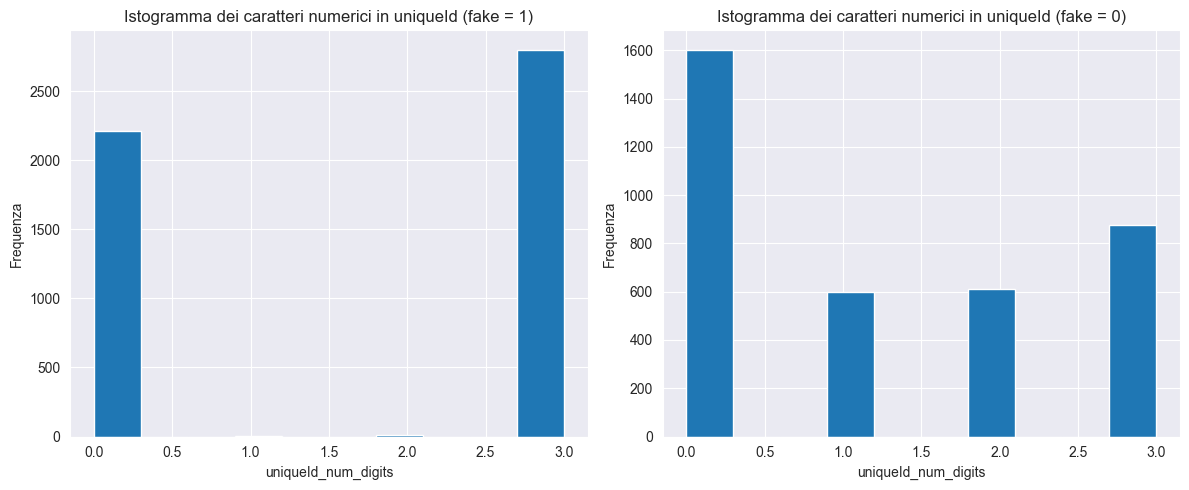

In [177]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df_fake_true['uniqueId_num_digits'].hist()
plt.xlabel('uniqueId_num_digits')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri numerici in uniqueId (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['uniqueId_num_digits'].hist()
plt.xlabel('uniqueId_num_digits')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri numerici in uniqueId (fake = 0)')

plt.tight_layout()
plt.show()

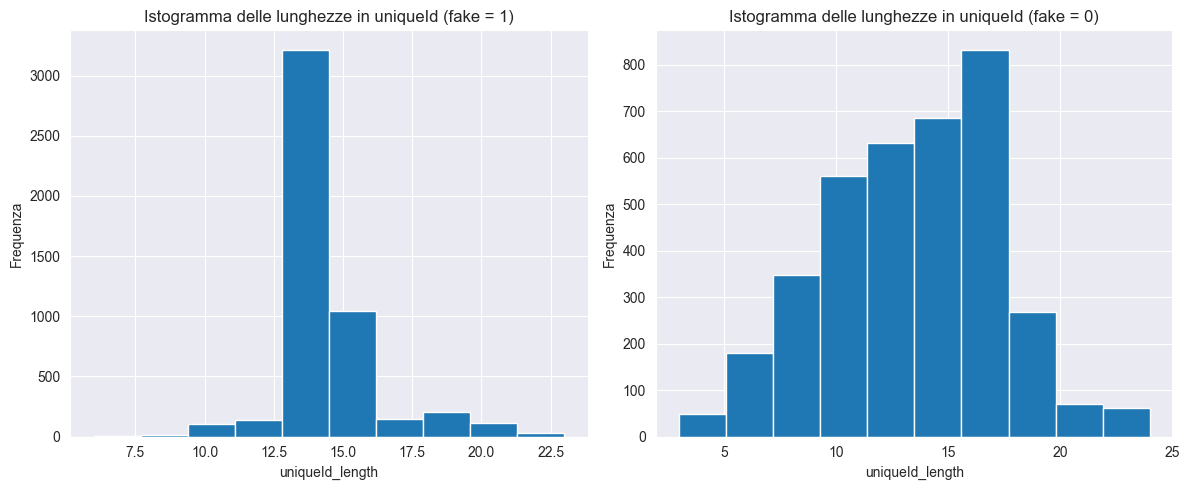

In [178]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_fake_true['uniqueId_length'].hist()
plt.xlabel('uniqueId_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze in uniqueId (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['uniqueId_length'].hist()
plt.xlabel('uniqueId_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze in uniqueId (fake = 0)')

plt.tight_layout()
plt.show()

## Trasformazione signature

In [179]:
df['signature_length'] = 0

df['signature'] = df['signature'].fillna('')

for i, signature in enumerate(df['signature']):
    df.loc[i, 'signature_length'] = len(signature)

In [180]:
df_fake_true = df[df['fake'] == 1]
df_fake_false = df[df['fake'] == 0]

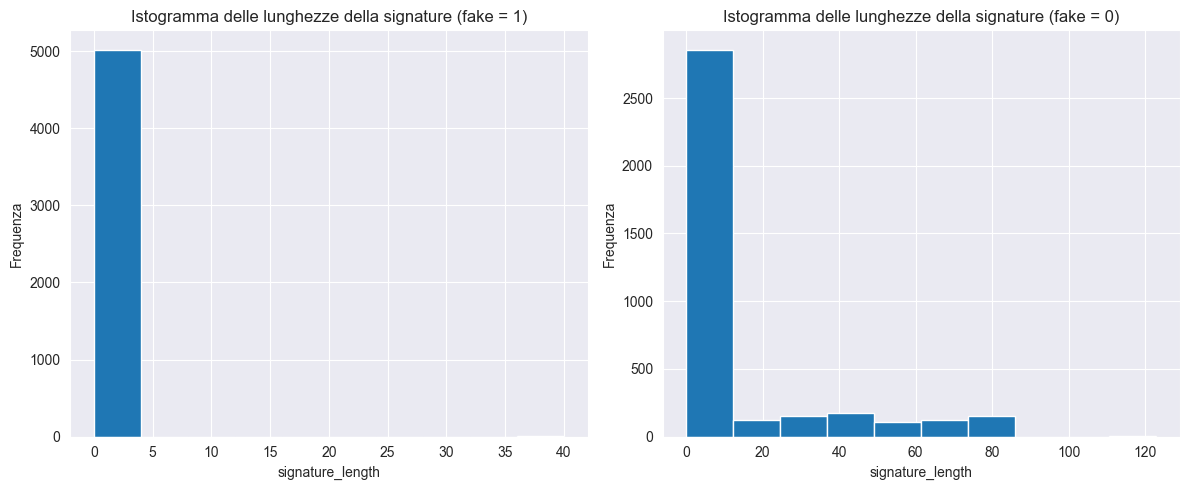

In [183]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df_fake_true['signature_length'].hist(bins=10)
plt.xlabel('signature_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze della signature (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['signature_length'].hist(bins=10)
plt.xlabel('signature_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze della signature (fake = 0)')

plt.tight_layout()
plt.show()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   diggCount                        8712 non-null   float64
 1   followerCount                    8712 non-null   float64
 2   followingCount                   8712 non-null   float64
 3   heartCount                       8712 non-null   float64
 4   videoCount                       8712 non-null   float64
 5   downloadSetting                  8712 non-null   int64  
 6   duetSetting                      8712 non-null   int64  
 7   nickname                         8712 non-null   object 
 8   openFavorite                     8712 non-null   int64  
 9   signature                        8712 non-null   object 
 10  stitchSetting                    8712 non-null   int64  
 11  uniqueId                         8712 non-null   object 
 12  verified            